In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns             #visualisation
import matplotlib.pyplot as plt   #visualisation
import os

%matplotlib inline 
sns.set(color_codes=True)

from dotenv import load_dotenv
from core_ds4a_project import cleaning, columns as project_columns, datasets

%load_ext autoreload
%autoreload 1
%aimport core_ds4a_project, core_ds4a_project.cleaning, core_ds4a_project.columns, core_ds4a_project.datasets

pd.set_option("display.max_columns", None)

In [2]:
import folium
import pingouin as pg
from folium.plugins import HeatMap

In [3]:
import statsmodels.formula.api as sm

Environment variables:

In [4]:
load_dotenv('envvars')

ROOT_DATA_PATH = os.environ.get('ROOT_DATA_PATH')
RAW_DATA_PATH = os.environ.get('RAW_DATA_PATH') or f'{ROOT_DATA_PATH}/raw'

Reading data:

In [5]:
(cartera_df, clientes_df, colocacion_df) = datasets.read_joining_datasets(dir_path=RAW_DATA_PATH)

Sorting CARTERA:

In [6]:
cartera_df = cartera_df.sort_values(['FECHA_CIERRE', 'OBLIGACION'], ascending=True)
ind_first = ~(cartera_df.duplicated(keep='first', subset='OBLIGACION'))
ind_last = ~(cartera_df.duplicated(keep='last', subset='OBLIGACION'))

<H2>EDA Cartera</H2>

In [7]:
cartera_df.shape

(569129, 32)

In [8]:
cartera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569129 entries, 210861 to 139217
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   OBLIGACION               569129 non-null  int32         
 1   CLIENTE                  569129 non-null  object        
 2   TIPO_CLIENTE_COD         569129 non-null  float64       
 3   TIPO_CLIENTE             569129 non-null  object        
 4   REGION                   569129 non-null  object        
 5   MUNICIPIO_CLIENTE        569119 non-null  object        
 6   VALOR_CUOTA              569129 non-null  object        
 7   CUOTAS_PACTADAS          569129 non-null  int32         
 8   CUOTAS_PENDIENTES        569129 non-null  int32         
 9   TASA_PERIODICA           569129 non-null  float64       
 10  PERIODICIDAD_PAGO        569129 non-null  category      
 11  CALIFICACION_CIERRE      569129 non-null  object        
 12  MODALIDAD  

In [9]:
# Finding the null values.
print(cartera_df.isnull().sum())

OBLIGACION                     0
CLIENTE                        0
TIPO_CLIENTE_COD               0
TIPO_CLIENTE                   0
REGION                         0
MUNICIPIO_CLIENTE             10
VALOR_CUOTA                    0
CUOTAS_PACTADAS                0
CUOTAS_PENDIENTES              0
TASA_PERIODICA                 0
PERIODICIDAD_PAGO              0
CALIFICACION_CIERRE            0
MODALIDAD                      0
SALDO                          0
VENCIDA                        0
DIAS_VENCIDO                   0
CAPITAL_VEN                    0
INTERES_VEN                    0
MORA                           0
SEGURO_VIDA                    0
COMISION                       0
OTROS                          0
FECHA_ULT_PAGO             45913
FECHA_PROXIMO_PAGO             0
FECHA_VENCIMIENTO_FINAL        0
PORCENTAJE_PAGO                0
TIPO_CREDITO                   0
SUCURSAL_COD                1016
FECHA_CIERRE                   0
SUCURSAL_REAL               4124
MUNICIPIO_

Lasts records by client:

In [10]:
lasts_records_cartera_df = cartera_df[ind_last].copy()
lasts_records_cartera_df.shape

(38641, 32)

In [11]:
lasts_records_cartera_df.head(5)

,OBLIGACION,CLIENTE,TIPO_CLIENTE_COD,TIPO_CLIENTE,REGION,MUNICIPIO_CLIENTE,VALOR_CUOTA,CUOTAS_PACTADAS,CUOTAS_PENDIENTES,TASA_PERIODICA,PERIODICIDAD_PAGO,CALIFICACION_CIERRE,MODALIDAD,SALDO,VENCIDA,DIAS_VENCIDO,CAPITAL_VEN,INTERES_VEN,MORA,SEGURO_VIDA,COMISION,OTROS,FECHA_ULT_PAGO,FECHA_PROXIMO_PAGO,FECHA_VENCIMIENTO_FINAL,PORCENTAJE_PAGO,TIPO_CREDITO,SUCURSAL_COD,FECHA_CIERRE,SUCURSAL_REAL,MUNICIPIO_LAT,MUNICIPIO_LON
210924,171000008,FA12448,1.0,Microfinanciero,REGION SUR,SABANALARGA,197638,12,12,2.64,Mensual,A,CREDITO RURAL INDIVIDUAL - GERMINA,2000000,-,0,-,-,-,-,0,0,2017-01-20,2017-02-19,2018-01-19,100.0,NUEVO,NaN,2017-01-31,MONTERREY,4.85430,-73.04003
210739,172000006,FA25175,1.0,Microfinanciero,REGION VILLAVICENCIO,VILLAVICENCIO,293974,36,36,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),6000000,-,0,-,-,-,-,0,0,NaT,2017-02-19,2020-01-19,100.0,RETANQUEADO,NaN,2017-01-31,VILLAVICENCIO,4.14200,-73.62664
210815,173000013,FA23399,1.0,Microfinanciero,REGION META,ACACIAS,183032,24,24,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),2950000,-,0,-,-,-,-,0,0,NaT,2017-02-27,2019-01-27,100.0,NUEVO,NaN,2017-01-31,ACACIAS,3.98695,-73.75797
210887,176000015,FA19928,1.0,Microfinanciero,REGION META,GRANADA,179930,24,24,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),2900000,-,0,-,-,-,-,0,0,NaT,2017-02-28,2019-01-31,100.0,NUEVO,NaN,2017-01-31,GRANADA,3.54625,-73.70687
210843,177000008,FA227,1.0,Microfinanciero,REGION SUR,MONTERREY,103305,12,12,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),1000000,-,0,-,-,-,-,0,0,NaT,2017-02-28,2018-01-31,100.0,NUEVO,NaN,2017-01-31,MONTERREY,4.87802,-72.89575


In [12]:
len(lasts_records_cartera_df['MUNICIPIO_CLIENTE'].unique())

74

In [13]:
# granada + villavivencio
len(cartera_df['MUNICIPIO_CLIENTE'].unique())

77

In [14]:
lasts_records_cartera_df['MUNICIPIO_CLIENTE'].unique()

array(['SABANALARGA', 'VILLAVICENCIO', 'ACACIAS', 'GRANADA', 'MONTERREY',
       'VILLANUEVA', 'TOPAGA', 'YOPAL', 'PAZ DE ARIPORO', 'SOGAMOSO',
       'GUAMAL', 'CUMARAL', 'LEJANIAS', 'TAMARA', 'HATO COROZAL',
       'NUNCHIA', 'EL DORADO', 'AGUAZUL', 'FUENTE DE ORO', 'MAYA',
       'TAURAMENA', 'OROCUE', 'SAN MARTIN', 'PORE', 'PESCA',
       'BARRANCA DE UPIA', 'CASTILLA LA NUEVA', 'SAN LUIS DE CUBARRAL',
       'MANI', 'MEDINA', 'TRINIDAD', 'RESTREPO', 'PARATEBUENO',
       'SAN LUIS DE GACENO', 'SAN LUIS DE PALENQUE', 'RECETOR', 'CUITIVA',
       'CHAMEZA', 'AQUITANIA', 'TIBASOSA', 'PAJARITO',
       'SAN JUAN DE ARAMA', 'TOTA', 'FIRAVITOBA', 'MONGUI', 'MONGUA',
       'IZA', 'NOBSA', 'GAMEZA', 'TAME', 'SIN UBICACION', 'DUITAMA',
       'CORRALES', 'PAIPA', 'SACAMA', 'SANTA ROSA DE VITERBO', 'TUNJA',
       'CASTILLO', 'SAMACA', 'GUAYABETAL', 'BELEN', 'VENTAQUEMADA',
       'CERINZA', 'COMBITA', 'SIACHOQUE', 'MOTAVITA', 'PUERTO LLERAS',
       'SORACA', 'VISTA HERMOSA', 'BUZBANZA', 

https://www.geodatos.net/

In [15]:
gps_df = pd.DataFrame([['YOPAL', 5.33775, -72.39586], 
                       ['NUCHIA',  5.63589, -72.19543],
                       ['SABANALARGA', 4.8543, -73.04003],
                       ['OROCUE', 4.79035, -71.33917],
                       ['SAN LUIS DE GACENO', 4.82052, -73.16851],
                       ['MONTERREY', 4.87802, -72.89575],
                       ['TAURAMENA', 5.01789, -72.74675],
                       ['VILLAVICENCIO', 4.142, -73.62664], 
                       ['GUAMAL', 3.88043, -73.76566], 
                       ['CASTILLA LA NUEVA',3.82722, -73.68831], 
                       ['ACACIAS', 3.98695, -73.75797], 
                       ['SAN LUIS DE CUBARRAL', 3.7958038,-73.8501173], 
                       ['EL DORADO', 2.77411, -72.86834], 
                       ['AGUAZUL', 5.17282, -72.54706], 
                       ['RESTREPO', 4.25833, -73.56142], 
                       ['CUMARAL', 4.2708, -73.48669], 
                       ['MEDINA', 4.5083995,-73.3498534], 
                       ['LEJANIAS', 3.52762, -74.02335], 
                       ['SAN MARTIN', 3.6985342,-73.7148605], 
                       ['GRANADA', 3.54625, -73.70687], 
                       ['FUENTE DE ORO', 3.46263, -73.62162], 
                       ['PAZ DE ARIPORO', 5.88148, -71.89167], 
                       ['TRINIDAD', 5.40849, -71.66196], 
                       ['TAMARA', 5.82998, -72.16286], 
                       ['HATO COROZAL', 6.1549678,-71.7711362], 
                       ['PORE', 5.72792, -71.99266], 
                       ['NOBSA', 5.76978, -72.94099], 
                       ['SOGAMOSO', 5.71434, -72.93391], 
                       ['AQUITANIA', 5.51858, -72.88387], 
                       ['TOPAGA', 5.75979, -72.82583], 
                       ['VILLANUEVA', 5.28333, -71.96667], 
                       ['BARRANCA DE UPIA', 4.56963, -72.96676], 
                       ['NUNCHIA', 5.63589, -72.19543], 
                       ['RECETOR', 5.22947, -72.76099], 
                       ['MANI', 4.81638, -72.27946], 
                       ['SAN LUIS DE PALENQUE', 5.42139, -71.73167], 
                       ['MAYA', 4.0556192,-73.761954], 
                       ['CHAMEZA', 5.21421, -72.86948], 
                       ['PAJARITO', 5.2929, -72.70277], 
                       ['PARATEBUENO', 4.37575, -73.21547], 
                       ['SAN JUAN DE ARAMA', 3.36985, -73.87267], 
                       ['CUITIVA', 5.58007, -72.96687], 
                       ['PESCA', 5.5588942,-73.0550196], 
                       ['FIRABITOBA', 5.66885, -72.99289], 
                       ['MONGUA', 5.75084, -72.80339], 
                       ['TOTA', 5.55833, -72.98757], 
                       ['TIBASOSA', 5.7472385,-73.0321971], 
                       ['GAMEZA', 5.80263, -72.80586], 
                       ['MONGUI', 5.7232166,-72.8534771], 
                       ['IZA', 5.6147192,-72.9843277], 
                       ['FIRAVITOBA', 5.66885, -72.99289], 
                       ['GUAYABETAL', 4.21472, -73.81719], 
                       ['SACAMA', 6.09908, -72.2488], 
                       ['TAME', 6.46065, -71.73618], 
                       ['MESETAS', 3.38463, -74.04424], 
                       ['CORRALES', 5.82968, -72.84332], 
                       ['CASTILLO', 3.56363, -73.79488], 
                       ['DUITAMA', 5.8245, -73.03408], 
                       ['PAIPA', 5.78013, -73.11708], 
                       ['SANTA ROSA DE VITERBO', 5.87401, -72.98217], 
                       ['BUZBANZA', 5.83047, -72.88419], 
                       ['BELEN', 5.98892, -72.91254], 
                       ['FLORESTA', 5.85903, -72.91882], 
                       ['TUNJA', 5.53528, -73.36778], 
                       ['CERINZA', 5.95568, -72.94783], 
                       ['SORACA', 5.50055, -73.33299], 
                       ['PUERTO LLERAS', 3.02225, -73.4044], 
                       ['MOTAVITA', 5.57655, -73.36696], 
                       ['VENTAQUEMADA', 5.36753, -73.52075], 
                       ['SIACHOQUE', 5.51238, -73.24436], 
                       ['SAMACA', 5.49273, -73.48537], 
                       ['COMBITA', 5.63333, -73.31667], 
                       ['TUTA', 5.68966, -73.22779], 
                       ['SOTAQUIRA', 5.76483, -73.24758], 
                       ['CHIQUIZA', 5.60412, -73.48518], 
                       ['VISTA HERMOSA',3.1279262,-73.770065], 
                       ['TUTAZA', 6.03228, -72.85639], 
                      ],columns=['MUNICIPIO_CLIENTE', 'MUNICIPIO_LAT', 'MUNICIPIO_LON'])
gps_df

,MUNICIPIO_CLIENTE,MUNICIPIO_LAT,MUNICIPIO_LON
0,YOPAL,5.337750,-72.395860
1,NUCHIA,5.635890,-72.195430
2,SABANALARGA,4.854300,-73.040030
3,OROCUE,4.790350,-71.339170
4,SAN LUIS DE GACENO,4.820520,-73.168510
...,...,...,...
72,TUTA,5.689660,-73.227790
73,SOTAQUIRA,5.764830,-73.247580
74,CHIQUIZA,5.604120,-73.485180
75,VISTA HERMOSA,3.127926,-73.770065


In [16]:
cartera_geo_df = pd.merge(lasts_records_cartera_df, gps_df, how='left', on="MUNICIPIO_CLIENTE")
cartera_geo_df.head()

,OBLIGACION,CLIENTE,TIPO_CLIENTE_COD,TIPO_CLIENTE,REGION,MUNICIPIO_CLIENTE,VALOR_CUOTA,CUOTAS_PACTADAS,CUOTAS_PENDIENTES,TASA_PERIODICA,PERIODICIDAD_PAGO,CALIFICACION_CIERRE,MODALIDAD,SALDO,VENCIDA,DIAS_VENCIDO,CAPITAL_VEN,INTERES_VEN,MORA,SEGURO_VIDA,COMISION,OTROS,FECHA_ULT_PAGO,FECHA_PROXIMO_PAGO,FECHA_VENCIMIENTO_FINAL,PORCENTAJE_PAGO,TIPO_CREDITO,SUCURSAL_COD,FECHA_CIERRE,SUCURSAL_REAL,MUNICIPIO_LAT_x,MUNICIPIO_LON_x,MUNICIPIO_LAT_y,MUNICIPIO_LON_y
0,171000008,FA12448,1.0,Microfinanciero,REGION SUR,SABANALARGA,197638,12,12,2.64,Mensual,A,CREDITO RURAL INDIVIDUAL - GERMINA,2000000,-,0,-,-,-,-,0,0,2017-01-20,2017-02-19,2018-01-19,100.0,NUEVO,NaN,2017-01-31,MONTERREY,4.85430,-73.04003,4.85430,-73.04003
1,172000006,FA25175,1.0,Microfinanciero,REGION VILLAVICENCIO,VILLAVICENCIO,293974,36,36,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),6000000,-,0,-,-,-,-,0,0,NaT,2017-02-19,2020-01-19,100.0,RETANQUEADO,NaN,2017-01-31,VILLAVICENCIO,4.14200,-73.62664,4.14200,-73.62664
2,173000013,FA23399,1.0,Microfinanciero,REGION META,ACACIAS,183032,24,24,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),2950000,-,0,-,-,-,-,0,0,NaT,2017-02-27,2019-01-27,100.0,NUEVO,NaN,2017-01-31,ACACIAS,3.98695,-73.75797,3.98695,-73.75797
3,176000015,FA19928,1.0,Microfinanciero,REGION META,GRANADA,179930,24,24,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),2900000,-,0,-,-,-,-,0,0,NaT,2017-02-28,2019-01-31,100.0,NUEVO,NaN,2017-01-31,GRANADA,3.54625,-73.70687,3.54625,-73.70687
4,177000008,FA227,1.0,Microfinanciero,REGION SUR,MONTERREY,103305,12,12,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),1000000,-,0,-,-,-,-,0,0,NaT,2017-02-28,2018-01-31,100.0,NUEVO,NaN,2017-01-31,MONTERREY,4.87802,-72.89575,4.87802,-72.89575


In [17]:
cartera_geo_df.shape

(38641, 34)

In [18]:
cartera_geo_df = cartera_geo_df.rename(columns={'MUNICIPIO_LAT_x':'MUNICIPIO_LAT',
                                                'MUNICIPIO_LON_x':'MUNICIPIO_LON'
                                               })

In [19]:
cartera_geo_df[cartera_geo_df['MUNICIPIO_LAT'].isnull()]

,OBLIGACION,CLIENTE,TIPO_CLIENTE_COD,TIPO_CLIENTE,REGION,MUNICIPIO_CLIENTE,VALOR_CUOTA,CUOTAS_PACTADAS,CUOTAS_PENDIENTES,TASA_PERIODICA,PERIODICIDAD_PAGO,CALIFICACION_CIERRE,MODALIDAD,SALDO,VENCIDA,DIAS_VENCIDO,CAPITAL_VEN,INTERES_VEN,MORA,SEGURO_VIDA,COMISION,OTROS,FECHA_ULT_PAGO,FECHA_PROXIMO_PAGO,FECHA_VENCIMIENTO_FINAL,PORCENTAJE_PAGO,TIPO_CREDITO,SUCURSAL_COD,FECHA_CIERRE,SUCURSAL_REAL,MUNICIPIO_LAT,MUNICIPIO_LON,MUNICIPIO_LAT_y,MUNICIPIO_LON_y
8867,193001718,FA23450,4.0,Codeudor no cliente,REGION ARIARI,SIN UBICACION,158282,18,16,3.20,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME) NUEVO,1838692,-,0,-82918,-63260,0,-1017,-14292,0,2019-06-10,2019-08-05,2020-11-05,91.93,NUEVO,3,2019-06-30,ACACIAS,NaN,NaN,NaN,NaN
9307,177000592,FA8638,4.0,Codeudor no cliente,REGION SUR,SIN UBICACION,237423,18,9,3.20,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME) NUEVO,1758481,-,0,0,-6143,0,0,0,0,2019-07-05,2019-08-05,2020-04-05,58.62,NUEVO,7,2019-07-31,MONTERREY,NaN,NaN,NaN,NaN
9476,192002723,FA5504,4.0,Codeudor no cliente,REGION VILLAVICENCIO,SIN UBICACION,349150,18,18,3.20,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME) NUEVO,4500000,-,0,0,-46512,0,0,0,0,2019-07-30,2019-09-10,2021-02-10,100.00,NUEVO,2,2019-07-31,VILLAVICENCIO,NaN,NaN,NaN,NaN
9827,174001266,FA9192,4.0,Codeudor no cliente,REGION SUR,SIN UBICACION,444081,6,4,8.64,Trimestral,A,CREDITO RURAL INDIVIDUAL - GERMINA NUEVO,1440261,-,0,0,-1503,0,0,0,0,2019-06-04,2019-09-04,2020-06-04,72.01,NUEVO,4,2019-08-31,AGUAZUL,NaN,NaN,NaN,NaN
9829,174001379,FA23709,4.0,Codeudor no cliente,REGION SUR,SIN UBICACION,145698,18,12,2.94,Mensual,A,MICROVIVIENDA,1445322,-,0,0,-330,0,-1017,0,0,2019-08-23,2019-09-01,2020-08-01,72.27,NUEVO,4,2019-08-31,AGUAZUL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,2011003028,FA6709,4.0,Codeudor no cliente,REGION SUR,SIN UBICACION,"415,152",36,32,3.30,Mensual,A,DESARROLLO EMPRESARIAL CRECER NUEVO DCA,7540371,-,0,0,-33464,0,-6800,-34194,0,2021-08-09,2021-09-02,2023-11-01,68.61,RETANQUEADO,2,2021-08-31,VILLANUEVA,NaN,NaN,NaN,NaN
38001,2011003154,FA6748,4.0,Codeudor no cliente,REGION SUR,SIN UBICACION,"221,414",18,11,3.04,Mensual,A,MICROVIVIENDA NUEVO DCA,1911606,-,0,-829185,-1849,0,0,0,0,2021-08-03,2022-02-05,2021-12-31,59.32,SIN_PERFIL,4,2021-08-31,VILLANUEVA,NaN,NaN,NaN,NaN
38136,2012001427,FA9717,4.0,Codeudor no cliente,REGION NORTE,SIN UBICACION,"107,673",12,4,3.30,Mensual,A,DESARROLLO EMPRESARIAL CRECER NUEVO DCA,387357,-,0,0,-12698,0,0,0,0,2021-08-03,2021-09-03,2024-02-02,64.12,RETANQUEADO,4,2021-08-31,TAME,NaN,NaN,NaN,NaN
38557,2112000007,FA5292,4.0,Codeudor no cliente,REGION NORTE,SIN UBICACION,"1,089,173",12,12,8.13,Trimestral,A,CREDITO RURAL INDIVIDUAL GERMINA,8000000,-,0,0,0,0,0,0,0,2021-06-30,2021-10-20,2021-10-20,19.14,NUEVO,11,2021-08-31,TAME,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Loan Default')

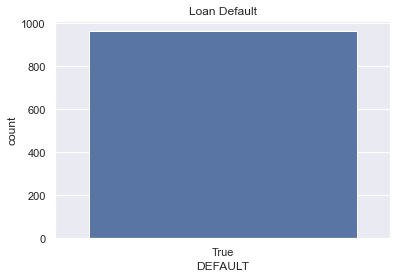

In [20]:
sns.countplot(x='DEFAULT', data = colocacion_df)
plt.title("Loan Default")

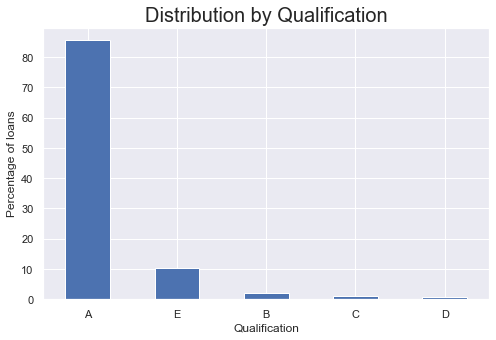

In [21]:
# Plotting a Histogram
((100*cartera_geo_df.CALIFICACION_CIERRE.value_counts()[:15].nlargest(40))/len(cartera_geo_df)).plot(kind='bar', figsize=(8,5))
plt.title("Distribution by Qualification", fontsize=20)
plt.xticks(rotation=0)
plt.ylabel("Percentage of loans")
plt.xlabel("Qualification")
plt.xticks(rotation=0);

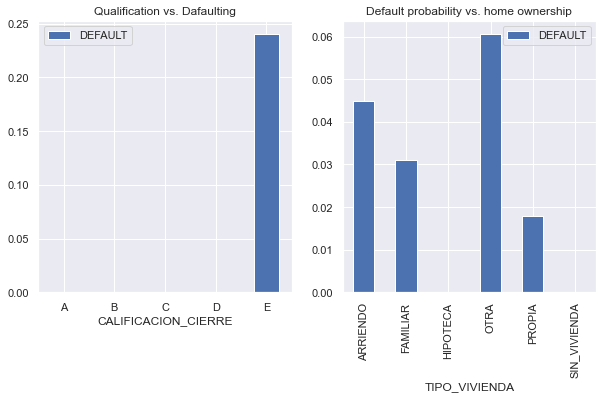

In [85]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
model_df[["CALIFICACION_CIERRE",'DEFAULT']].groupby("CALIFICACION_CIERRE").mean().plot.bar(rot=0,ax = ax1)
ax1.set_title("Qualification vs. Dafaulting")

model_df[["TIPO_VIVIENDA",'DEFAULT']].groupby("TIPO_VIVIENDA").mean().plot.bar(rot=90,ax = ax2)
plt.title("Default probability vs. home ownership");

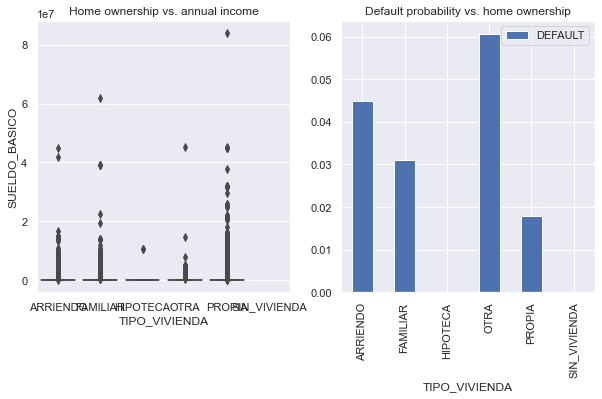

In [82]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.boxplot(x="TIPO_VIVIENDA", y="SUELDO_BASICO", data = model_df, showfliers=True, ax = ax1) #showfliers=False for nice display
ax1.set_title("Home ownership vs. annual income")

model_df[["TIPO_VIVIENDA",'DEFAULT']].groupby("TIPO_VIVIENDA").mean().plot.bar(rot=90,ax = ax2)
plt.title("Default probability vs. home ownership");

In [22]:
# Colombia!!
co_coords = [4.570868, -74.297333] # lat, long

In [23]:
folium_hmap = folium.Map(location=co_coords, zoom_start=7, tiles="OpenStreetMap")

In [24]:
cartera_A_df = cartera_geo_df[  (cartera_geo_df['CALIFICACION_CIERRE'] == 'A') 
                                & ( (cartera_geo_df['MUNICIPIO_LAT'].notna()) |
                                    (cartera_geo_df['MUNICIPIO_LON'].notna())
                                  )  
                             ]
cartera_A_df.shape

(32940, 34)

In [25]:
my_zip = zip(cartera_A_df['MUNICIPIO_LAT'], cartera_A_df['MUNICIPIO_LON'], cartera_A_df['SALDO'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:5]

[(4.8543, -73.04003, 2000000),
 (4.142, -73.62664, 6000000),
 (3.98695, -73.75797, 2950000),
 (3.54625, -73.70687, 2900000),
 (4.87802, -72.89575, 1000000)]

In [26]:
hm_layer_A = HeatMap(list_of_my_zip,
                     # These are parameters that we tweak manually to adjust color
                     # See folium docs for more information
                     min_opacity=0.2,
                     radius=10,
                     blur=6, 
                    )

folium_hmap.add_child(hm_layer_A)
folium_hmap

Default:

In [27]:
cartera_BCDE_df = cartera_geo_df[((cartera_geo_df['CALIFICACION_CIERRE'] == 'B')|
                                  (cartera_geo_df['CALIFICACION_CIERRE'] == 'C')|
                                  (cartera_geo_df['CALIFICACION_CIERRE'] == 'D')|
                                  (cartera_geo_df['CALIFICACION_CIERRE'] == 'E')
                                 ) & 
                                 ( (cartera_geo_df['MUNICIPIO_LAT'].notna()) | 
                                   (cartera_geo_df['MUNICIPIO_LON'].notna())
                                 )
                                ]
cartera_BCDE_df.shape

(5613, 34)

In [28]:
my_zip = zip(cartera_BCDE_df['MUNICIPIO_LAT'], cartera_BCDE_df['MUNICIPIO_LON'], cartera_BCDE_df['SALDO'])
list_of_my_zip_default = list(my_zip)
list_of_my_zip_default[0:5]

[(4.142, -73.62664, 6861843),
 (5.33775, -72.39586, 9000000),
 (5.17282, -72.54706, 361694),
 (6.1549678, -71.7711362, 779346),
 (5.33775, -72.39586, 1821841)]

In [29]:
hm_layer_default = HeatMap(list_of_my_zip_default,
                           # These are parameters that we tweak manually to adjust color
                           # See folium docs for more information
                           min_opacity=0.2,
                           radius=10,
                           blur=6, 
                         )

folium_hmap.add_child(hm_layer_default)
folium_hmap

In [30]:
len(cartera_A_df['CLIENTE'].unique()), len(cartera_A_df['OBLIGACION'].unique())

(19005, 32940)

In [31]:
len(cartera_BCDE_df['CLIENTE'].unique()), len(cartera_BCDE_df['OBLIGACION'].unique())

(5480, 5613)

<H2>Data for Modeling:</H2>

In [32]:
model1_df = pd.merge(cartera_geo_df, colocacion_df, how='left', on="OBLIGACION", suffixes=('_left', '_right'))
model1_df.shape

(38641, 59)

In [33]:
model1_df.head(5)

,OBLIGACION,CLIENTE_left,TIPO_CLIENTE_COD,TIPO_CLIENTE,REGION,MUNICIPIO_CLIENTE,VALOR_CUOTA_left,CUOTAS_PACTADAS,CUOTAS_PENDIENTES,TASA_PERIODICA,PERIODICIDAD_PAGO_left,CALIFICACION_CIERRE,MODALIDAD_left,SALDO,VENCIDA,DIAS_VENCIDO,CAPITAL_VEN,INTERES_VEN,MORA,SEGURO_VIDA,COMISION,OTROS,FECHA_ULT_PAGO,FECHA_PROXIMO_PAGO,FECHA_VENCIMIENTO_FINAL,PORCENTAJE_PAGO,TIPO_CREDITO_left,SUCURSAL_COD,FECHA_CIERRE,SUCURSAL_REAL,MUNICIPIO_LAT,MUNICIPIO_LON,MUNICIPIO_LAT_y,MUNICIPIO_LON_y,TASA_ANUAL,MONTO,VALOR_REFINANCIADO,VALOR_DESEMBOLSADO,FECHA_SOLICITUD,FECHA_APROBA,FECHA_DESEMBOLSO,COD_LINEA,LINEA,COD_DESTINACION,DESTINACION,OBSERVACIONES,VALOR_CUOTA_right,NRO_CUOTAS,FECHA_PAGO,PERIODICIDAD_PAGO_right,COD_MODALIDAD,MODALIDAD_right,ANO_CONTABILIZA,CODEUDOR,DIAS_CICLO_CREDITO,CREDITOS_VIGENTES,TIPO_CREDITO_right,CLIENTE_right,DEFAULT
0,171000008,FA12448,1.0,Microfinanciero,REGION SUR,SABANALARGA,197638,12,12,2.64,Mensual,A,CREDITO RURAL INDIVIDUAL - GERMINA,2000000,-,0,-,-,-,-,0,0,2017-01-20,2017-02-19,2018-01-19,100.0,NUEVO,NaN,2017-01-31,MONTERREY,4.85430,-73.04003,4.85430,-73.04003,31.67,2000000,0,2000000,2017-01-19,2017-01-20,2017-01-20,GER,GERMINA,CT,CAPITAL DE TRABAJO,"CLIENTE MANEJO CREDITO CON FUNDACION, BUEN MAN...",197638,12,2017-02-19,Mensual,403,CREDITO RURAL INDIVIDUAL GERMINA,2017,COUDEUDOR_1,1,NaN,NUEVO,FA12448,NaN
1,172000006,FA25175,1.0,Microfinanciero,REGION VILLAVICENCIO,VILLAVICENCIO,293974,36,36,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),6000000,-,0,-,-,-,-,0,0,NaT,2017-02-19,2020-01-19,100.0,RETANQUEADO,NaN,2017-01-31,VILLAVICENCIO,4.14200,-73.62664,4.14200,-73.62664,35.29,6000000,649671,5330847,2017-01-19,2017-01-24,2017-01-24,CRE,CRECER,CT,CAPITAL DE TRABAJO,"CLIENTE CON CREDITO ANTERIOR POR 4 MILLONES, B...",293974,36,2017-02-19,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,CODEUDOR_B,5,NaN,RETANQUEADO,FA25175,NaN
2,173000013,FA23399,1.0,Microfinanciero,REGION META,ACACIAS,183032,24,24,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),2950000,-,0,-,-,-,-,0,0,NaT,2017-02-27,2019-01-27,100.0,NUEVO,NaN,2017-01-31,ACACIAS,3.98695,-73.75797,3.98695,-73.75797,35.29,2950000,0,2950000,2017-01-24,2017-01-27,2017-01-27,CRE,CRECER,CT,CAPITAL DE TRABAJO,CLIENTE CON EXPERIENCIA DE MÁS DE 10 EN SECTOR...,183032,24,2017-02-27,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,SIN_CODEUDOR,3,NaN,NUEVO,FA23399,NaN
3,176000015,FA19928,1.0,Microfinanciero,REGION META,GRANADA,179930,24,24,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),2900000,-,0,-,-,-,-,0,0,NaT,2017-02-28,2019-01-31,100.0,NUEVO,NaN,2017-01-31,GRANADA,3.54625,-73.70687,3.54625,-73.70687,35.29,2900000,0,2900000,2017-01-25,2017-01-31,2017-01-31,CRE,CRECER,MX,MIXTO,CLIENTE DE 42 AÑOS TRAYECTORIA EN LA ACTIVIDAD...,179930,24,2017-02-28,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,CODEUDOR_B,6,1.0,NUEVO,FA19928,NaN
4,177000008,FA227,1.0,Microfinanciero,REGION SUR,MONTERREY,103305,12,12,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),1000000,-,0,-,-,-,-,0,0,NaT,2017-02-28,2018-01-31,100.0,NUEVO,NaN,2017-01-31,MONTERREY,4.87802,-72.89575,4.87802,-72.89575,35.29,1000000,0,1000000,2017-01-25,2017-01-30,2017-01-30,CRE,CRECER,CT,CAPITAL DE TRABAJO,"CLIENTE DE RENOVACION BUEN HABITO DE PAGOS, CL...",103305,12,2017-02-28,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,SIN_CODEUDOR,5,NaN,NUEVO,FA227,NaN


In [34]:
model1_df = model1_df.rename(columns={'CLIENTE_left':'CLIENTE',
                                      'VALOR_CUOTA_left':'VALOR_CUOTA'
                                     })

In [35]:
model_df = pd.merge(model1_df, clientes_df, how='left', on="CLIENTE", suffixes=('_left_model', '_right_client'))
model_df.shape

(38641, 85)

In [36]:
model_df.head()

,OBLIGACION,CLIENTE,TIPO_CLIENTE_COD,TIPO_CLIENTE,REGION,MUNICIPIO_CLIENTE,VALOR_CUOTA,CUOTAS_PACTADAS,CUOTAS_PENDIENTES,TASA_PERIODICA,PERIODICIDAD_PAGO_left,CALIFICACION_CIERRE,MODALIDAD_left,SALDO,VENCIDA,DIAS_VENCIDO,CAPITAL_VEN,INTERES_VEN,MORA,SEGURO_VIDA,COMISION,OTROS,FECHA_ULT_PAGO,FECHA_PROXIMO_PAGO,FECHA_VENCIMIENTO_FINAL,PORCENTAJE_PAGO,TIPO_CREDITO_left,SUCURSAL_COD,FECHA_CIERRE,SUCURSAL_REAL,MUNICIPIO_LAT,MUNICIPIO_LON,MUNICIPIO_LAT_y,MUNICIPIO_LON_y,TASA_ANUAL,MONTO,VALOR_REFINANCIADO,VALOR_DESEMBOLSADO,FECHA_SOLICITUD,FECHA_APROBA,FECHA_DESEMBOLSO,COD_LINEA,LINEA,COD_DESTINACION,DESTINACION,OBSERVACIONES,VALOR_CUOTA_right,NRO_CUOTAS,FECHA_PAGO,PERIODICIDAD_PAGO_right,COD_MODALIDAD,MODALIDAD_right,ANO_CONTABILIZA,CODEUDOR,DIAS_CICLO_CREDITO,CREDITOS_VIGENTES,TIPO_CREDITO_right,CLIENTE_right,DEFAULT,EDAD,ESTRATO,SUCURSAL,TIPO_DE_CLIENTE,SUELDO_BASICO,ACTIVIDAD_ECONOMICA,TIPO_DE_IDENTIFICACION,OFICIO,MUJER_CABEZA,RESPONSABLE_DE_HOGAR,OCUPACION,ACTIVIDAD_CIIU_PRIMARIA,ESTADO_CIVIL_COD,GENERO_COD,NIVEL_ESTUDIOS_COD,PROFESION_COD,TIPO_UBICACION_COD,TIPO_VIVIENDA_COD,PROFESION,TIPO_UBICACION,FECHA_NACIMIENTO,GENERO,NIVEL_ESTUDIOS,ESTADO_CIVIL,TIPO_VIVIENDA,ACTIVIDAD
0,171000008,FA12448,1.0,Microfinanciero,REGION SUR,SABANALARGA,197638,12,12,2.64,Mensual,A,CREDITO RURAL INDIVIDUAL - GERMINA,2000000,-,0,-,-,-,-,0,0,2017-01-20,2017-02-19,2018-01-19,100.0,NUEVO,NaN,2017-01-31,MONTERREY,4.85430,-73.04003,4.85430,-73.04003,31.67,2000000,0,2000000,2017-01-19,2017-01-20,2017-01-20,GER,GERMINA,CT,CAPITAL DE TRABAJO,"CLIENTE MANEJO CREDITO CON FUNDACION, BUEN MAN...",197638,12,2017-02-19,Mensual,403,CREDITO RURAL INDIVIDUAL GERMINA,2017,COUDEUDOR_1,1,NaN,NUEVO,FA12448,NaN,51,1.0,MONTERREY |7,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,NaN,No |N,No |N,Independiente |2,NaN,U,F,P,204,2,NaN,AGRICULTURA,RURAL,1971-05-26,Femenino,Primaria,Union libre,NaN,Produccion |P
1,172000006,FA25175,1.0,Microfinanciero,REGION VILLAVICENCIO,VILLAVICENCIO,293974,36,36,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),6000000,-,0,-,-,-,-,0,0,NaT,2017-02-19,2020-01-19,100.0,RETANQUEADO,NaN,2017-01-31,VILLAVICENCIO,4.14200,-73.62664,4.14200,-73.62664,35.29,6000000,649671,5330847,2017-01-19,2017-01-24,2017-01-24,CRE,CRECER,CT,CAPITAL DE TRABAJO,"CLIENTE CON CREDITO ANTERIOR POR 4 MILLONES, B...",293974,36,2017-02-19,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,CODEUDOR_B,5,NaN,RETANQUEADO,FA25175,NaN,48,2.0,VILLAVICENCIO |2,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,SUMINISTROS EQUIPOS OBRAS CIVI,No |N,No |N,Independiente |2,OTRAS ACTIVIDADES ESPECIALIZADAS PARA LA CONST...,C,M,V,NaN,1,O,NaN,URBANA,1974-01-30,Masculino,Tecnológica,Casado,OTRA,Servicios |S
2,173000013,FA23399,1.0,Microfinanciero,REGION META,ACACIAS,183032,24,24,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),2950000,-,0,-,-,-,-,0,0,NaT,2017-02-27,2019-01-27,100.0,NUEVO,NaN,2017-01-31,ACACIAS,3.98695,-73.75797,3.98695,-73.75797,35.29,2950000,0,2950000,2017-01-24,2017-01-27,2017-01-27,CRE,CRECER,CT,CAPITAL DE TRABAJO,CLIENTE CON EXPERIENCIA DE MÁS DE 10 EN SECTOR...,183032,24,2017-02-27,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,SIN_CODEUDOR,3,NaN,NUEVO,FA23399,NaN,53,2.0,ACACIAS |3,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,NaN,Si |Y,Si |Y,Independiente |2,NaN,U,M,S,116,1,F,ADMON TRANSPORTE,URBANA,1968-11-08,Masculino,Secundaria,Union libre,FAMILIAR,Servicios |S
3,176000015,FA19928,1.0,Microfinanciero,REGION META,GRANADA,179930,24,24,2.94,Mensual,A,DESARROLLO EMPRESARIAL CRECER (PYME),2900000,-,0,-,-,-,-,0,0,NaT,2017-02-28,2019-01-31,100.0,NUEVO,NaN,2017-01-31,GRANADA,3.54625,-73.70687,3.54625,-73.70687,35.29,2900000,0,2900000,2017-01-25,2017-01-31,2017-01-31,CRE,CRECER,MX,MIXTO,CLIENTE DE 42 AÑOS TRAYECTORIA EN LA ACTIVIDAD...,179930,24,2017-02-28,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,CODEUDOR_B,6,1.0,NUEVO,FA19928,NaN,50,2.0,GRANADA |6,Microfinanciero,1400000.0,Neg

In [37]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38641 entries, 0 to 38640
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   OBLIGACION               38641 non-null  int32         
 1   CLIENTE                  38641 non-null  object        
 2   TIPO_CLIENTE_COD         38641 non-null  float64       
 3   TIPO_CLIENTE             38641 non-null  object        
 4   REGION                   38641 non-null  object        
 5   MUNICIPIO_CLIENTE        38641 non-null  object        
 6   VALOR_CUOTA              38641 non-null  object        
 7   CUOTAS_PACTADAS          38641 non-null  int32         
 8   CUOTAS_PENDIENTES        38641 non-null  int32         
 9   TASA_PERIODICA           38641 non-null  float64       
 10  PERIODICIDAD_PAGO_left   38641 non-null  category      
 11  CALIFICACION_CIERRE      38641 non-null  object        
 12  MODALIDAD_left           38641 n

In [38]:
null_eda = model_df.isnull().sum().to_frame(name='Nulos').reset_index()
null_eda[null_eda['Nulos'] > 0]

,index,Nulos
22,FECHA_ULT_PAGO,3034
27,SUCURSAL_COD,8
29,SUCURSAL_REAL,12
30,MUNICIPIO_LAT,88
31,MUNICIPIO_LON,88
32,MUNICIPIO_LAT_y,88
33,MUNICIPIO_LON_y,88
45,OBSERVACIONES,644
55,CREDITOS_VIGENTES,19887
58,DEFAULT,37678


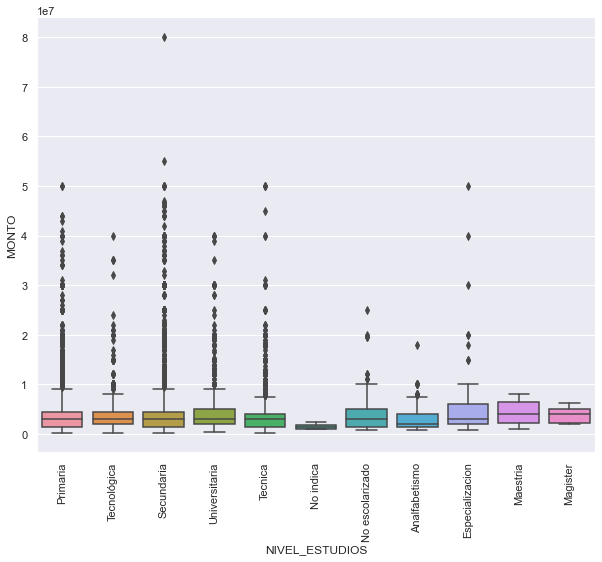

In [39]:
plt.figure(figsize= (10,8))
sns.boxplot(x="NIVEL_ESTUDIOS", y="MONTO", data=model_df)
plt.xticks(rotation=90);

In [40]:
model_df['DEFAULT_Q'] = 0
nok = model_df["CALIFICACION_CIERRE"] != "A"
model_df.loc[nok,'DEFAULT_Q'] = 1

In [41]:
model_df.loc[:,'DEFAULT_Q'][nok]

61       1
84       1
175      1
299      1
333      1
        ..
38174    1
38261    1
38270    1
38274    1
38359    1
Name: DEFAULT_Q, Length: 5620, dtype: int64

- Mes(n-3) Credit 1 Q=A
- Mes(n-2) Credit 1 Q=A
- Mes(n-1) Credit 1 Q=B  ---- ultimo  -> DEFAULT_Q = 1

- Mes(n-1) Credito 2 Q=A ---- ultimo  -> DEFAULT_Q = 0

In [42]:
model_df['DEFAULT_Q'].unique()

array([0, 1], dtype=int64)

In [43]:
len(model_df.loc[model_df['DEFAULT_Q'] == 1])

5620

In [44]:
len(model_df.loc[model_df['DEFAULT_Q'] == 0])

33021

In [45]:
nok2 = model_df["DEFAULT"] != True
model_df.loc[nok2,'DEFAULT'] = 0

In [46]:
nok3 = model_df["DEFAULT"] == True
model_df.loc[nok3,'DEFAULT'] = 1

In [47]:
model_df['DEFAULT'] = model_df['DEFAULT'].astype('int64')

In [48]:
model_df['DEFAULT'].unique()

array([0, 1], dtype=int64)

In [49]:
len(model_df.loc[model_df['DEFAULT'] == 1])

963

In [50]:
len(model_df.loc[model_df['DEFAULT'] == 0])

37678

In [51]:
model_df['CREDITOS_VIGENTES'].unique()

array([nan,  1.,  2.,  3.])

In [52]:
#model_df['CREDITOS_VIGENTES'] = model_df['CREDITOS_VIGENTES'].replace([np.nan],[0])

In [53]:
model_df['CREDITOS_VIGENTES'].unique()

array([nan,  1.,  2.,  3.])

In [54]:
model_df.loc[model_df['DEFAULT_Q'] == 1].head()

,OBLIGACION,CLIENTE,TIPO_CLIENTE_COD,TIPO_CLIENTE,REGION,MUNICIPIO_CLIENTE,VALOR_CUOTA,CUOTAS_PACTADAS,CUOTAS_PENDIENTES,TASA_PERIODICA,PERIODICIDAD_PAGO_left,CALIFICACION_CIERRE,MODALIDAD_left,SALDO,VENCIDA,DIAS_VENCIDO,CAPITAL_VEN,INTERES_VEN,MORA,SEGURO_VIDA,COMISION,OTROS,FECHA_ULT_PAGO,FECHA_PROXIMO_PAGO,FECHA_VENCIMIENTO_FINAL,PORCENTAJE_PAGO,TIPO_CREDITO_left,SUCURSAL_COD,FECHA_CIERRE,SUCURSAL_REAL,MUNICIPIO_LAT,MUNICIPIO_LON,MUNICIPIO_LAT_y,MUNICIPIO_LON_y,TASA_ANUAL,MONTO,VALOR_REFINANCIADO,VALOR_DESEMBOLSADO,FECHA_SOLICITUD,FECHA_APROBA,FECHA_DESEMBOLSO,COD_LINEA,LINEA,COD_DESTINACION,DESTINACION,OBSERVACIONES,VALOR_CUOTA_right,NRO_CUOTAS,FECHA_PAGO,PERIODICIDAD_PAGO_right,COD_MODALIDAD,MODALIDAD_right,ANO_CONTABILIZA,CODEUDOR,DIAS_CICLO_CREDITO,CREDITOS_VIGENTES,TIPO_CREDITO_right,CLIENTE_right,DEFAULT,EDAD,ESTRATO,SUCURSAL,TIPO_DE_CLIENTE,SUELDO_BASICO,ACTIVIDAD_ECONOMICA,TIPO_DE_IDENTIFICACION,OFICIO,MUJER_CABEZA,RESPONSABLE_DE_HOGAR,OCUPACION,ACTIVIDAD_CIIU_PRIMARIA,ESTADO_CIVIL_COD,GENERO_COD,NIVEL_ESTUDIOS_COD,PROFESION_COD,TIPO_UBICACION_COD,TIPO_VIVIENDA_COD,PROFESION,TIPO_UBICACION,FECHA_NACIMIENTO,GENERO,NIVEL_ESTUDIOS,ESTADO_CIVIL,TIPO_VIVIENDA,ACTIVIDAD,DEFAULT_Q
61,172000131,FA25084,1.0,Microfinanciero,REGION VILLAVICENCIO,VILLAVICENCIO,"378,753",30,29,2.94,Mensual,B,DESARROLLO EMPRESARIAL CRECER (PYME),6861843,"6,861,843",75,"443,180","592,475","23,942","10,674","92,480",-,2017-04-30,2017-05-15,2019-09-15,98.03,NUEVO,2,2017-07-31,VILLAVICENCIO,4.142000,-73.626640,4.142000,-73.626640,35.28,7000000,0,7000000,2017-03-13,2017-03-15,2017-03-15,CRE,CRECER,CT,CAPITAL DE TRABAJO,CLIENTE COMERCIANTE DE CUAJADA EN CENTRO MAYOR...,378753,30,2017-04-15,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,COUDEUDOR_1,2,NaN,NUEVO,FA25084,0,61,1.0,VILLAVICENCIO |2,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,NaN,No |N,No |N,Independiente |2,NaN,C,F,S,NaN,1,F,NaN,URBANA,1960-12-25,Femenino,Secundaria,Casado,FAMILIAR,Comercio |C,1
84,171000011,FA23025,1.0,Microfinanciero,REGION CENTRO,YOPAL,"1,587,490",8,8,8.13,Trimestral,D,CREDITO RURAL INDIVIDUAL - GERMINA,9000000,"9,000,000",130,"1,752,896","1,386,508","177,808","27,462",-,-,NaT,2017-04-20,2019-01-20,100.00,RETANQUEADO,1,2017-08-31,YOPAL,5.337750,-72.395860,5.337750,-72.395860,31.67,9000000,0,9000000,2017-01-20,2017-01-21,2017-01-21,GER,GERMINA,CT,CAPITAL DE TRABAJO,CLIENTE DE LA FUNDACIÓN CON 3 SOLICITUDES DOND...,1587490,8,2017-04-20,Trimestral,403,CREDITO RURAL INDIVIDUAL GERMINA,2017,SIN_CODEUDOR,3,NaN,RETANQUEADO,FA23025,0,61,2.0,YOPAL |1,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,GANADERIA,No |N,NaN,Independiente |2,CRÍA DE GANADO BOVINO Y BUFALINO |141|A,C,M,P,NaN,1,P,NaN,URBANA,1960-10-04,Masculino,Primaria,Casado,PROPIA,Produccion |P,1
175,174000023,FA2648,1.0,Microfinanciero,REGION SUR,AGUAZUL,"374,962",6,1,2.94,Mensual,B,DESARROLLO EMPRESARIAL CRECER (PYME),361694,"361,694",44,"361,694","5,591","19,688","1,017","1,614",-,2017-10-11,2017-08-16,2017-08-16,18.08,RETANQUEADO,4,2017-09-30,AGUAZUL,5.172820,-72.547060,5.172820,-72.547060,35.29,2000000,0,2000000,2017-02-03,2017-02-16,2017-02-16,CRE,CRECER,MX,MIXTO,"CLIENTE DEICADA A LA VENTA POR CATALOGO, RECIB...",374962,6,2017-03-16,Mensual,400,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2017,SIN_CODEUDOR,13,NaN,RETANQUEADO,FA2648,0,33,2.0,AGUAZUL |4,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,VENTA POR CATALOGO,No |N,No |N,Independiente |2,OTROS TIPOS DE COMERCIO AL POR MENOR NO REALIZ...,C,F,V,D,1,P,NaN,URBANA,1989-04-01,Femenino,Tecnológica,Casado,PROPIA,Comercio |C,1
299,178000207,FA24179,1.0,Microfinanciero,REGION NORTE,HATO COROZAL,"75,612",18,13,2.94,Mensual,B,DESARROLLO EMPRESARIAL CRECER (PYME),779346,"779,346",43,"99,077","44,393","3,488",508,"6,632",-,2017-08-24,2017-09-17,2018-09-17,77.93,NUEVO,8,2017-10-31,PAZ DE ARIPORO,6.154968,-71.771136,6.154968,-71.771136,35.28,1000000,0,1000000,2017-03-15,2017-03-17,2017-03-17,CRE,CRECER,MX,MIXTO,CLIEN

Looking at correlations:

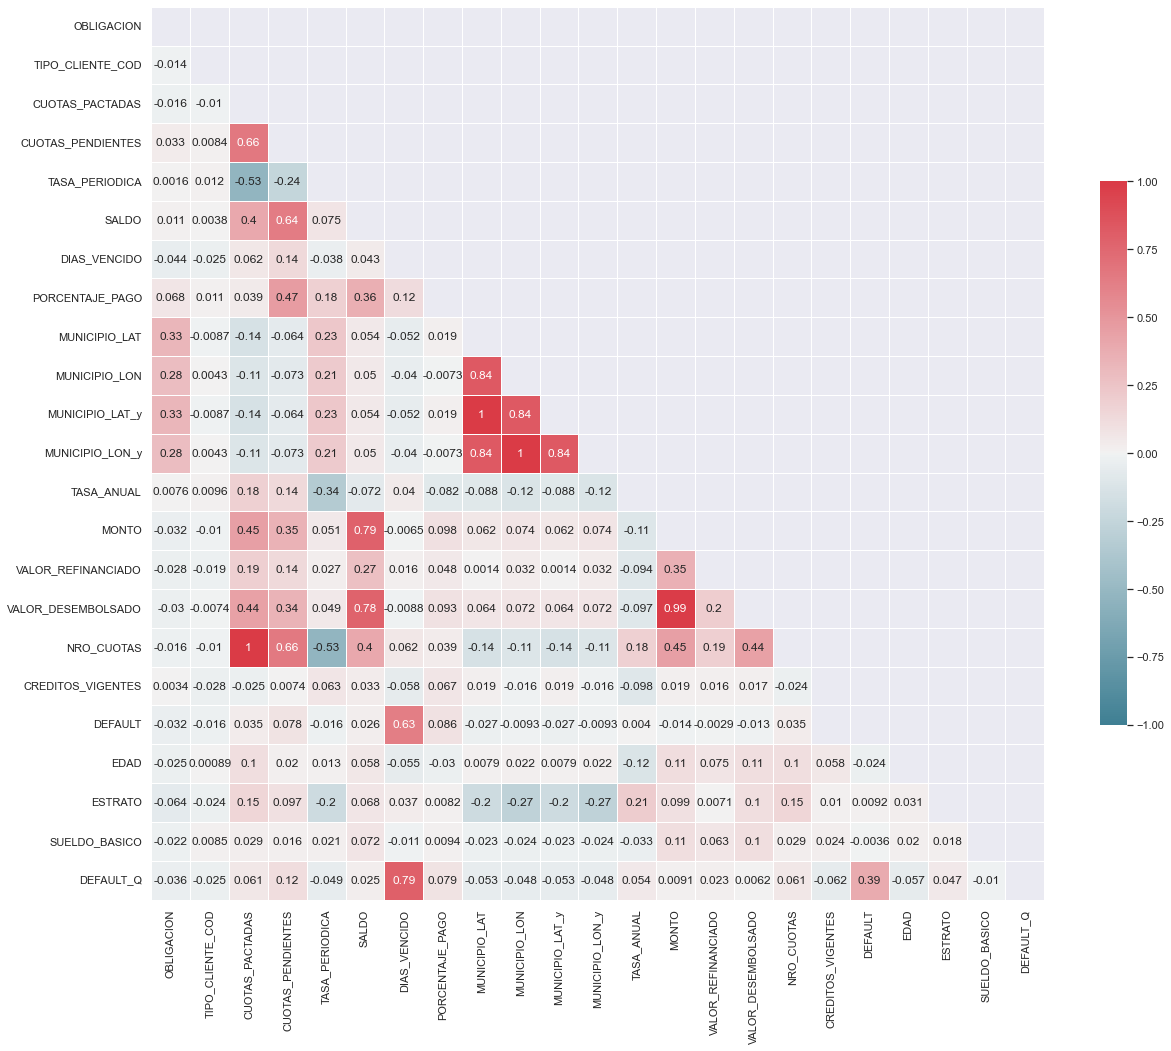

In [55]:
#compute correlation matrix
df_correlations = model_df.corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,
            mask=mask,  
            vmax=1, 
            vmin=-1, 
            cmap=cmap, 
            center=0,
            annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Split our data into training and testing sets (an 80-20 split is a good starting point):

In [56]:
np.random.seed(1234) # a seed makes the analysis reproducible
                     # so everyone will get the same results

n_data = len(model_df)

# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(n_data), int(0.8*n_data), replace=False)

# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(n_data)) - set(idx_train)))

df_train     = model_df.iloc[idx_train] # the training data set
df_test      = model_df.iloc[idx_test]  # the test data set

print(df_train.shape) 
print(df_test.shape)  

(30912, 86)
(7729, 86)


In [57]:
len(df_train.loc[df_train['DEFAULT_Q'] == 1])

4456

In [58]:
len(df_test.loc[df_test['DEFAULT_Q'] == 1])

1164

In [59]:
df_train['DEFAULT'].unique()

array([0, 1], dtype=int64)

In [60]:
len(df_train.loc[df_train['DEFAULT'] == 1])

780

In [61]:
len(df_train.loc[df_train['DEFAULT'] == 0])

30132

In [62]:
df_train.shape

(30912, 86)

In [63]:
df_train.dropna().shape

(3382, 86)

<H2> MODEL 1: Multiple linear regression </H2>

In [72]:
formula_lin1 = 'DEFAULT ~  SALDO + C(ESTADO_CIVIL_COD) + '\
                       + 'C(TIPO_VIVIENDA) + C(MUNICIPIO_CLIENTE) + C(CALIFICACION_CIERRE) + '\
                       + 'C(CUOTAS_PENDIENTES) + VALOR_DESEMBOLSADO + PORCENTAJE_PAGO + '\
                       + 'VALOR_REFINANCIADO + C(NRO_CUOTAS) + '\
                       + 'C(TIPO_UBICACION_COD) + C(MUJER_CABEZA) + C(RESPONSABLE_DE_HOGAR) + C(OCUPACION) + '\
                       + 'C(GENERO_COD) + C(ESTRATO) + SUELDO_BASICO + EDAD + TASA_PERIODICA + C(NIVEL_ESTUDIOS_COD)'
model_lin1 = sm.ols(formula = formula_lin1, data = df_train).fit()
print(model_lin1.summary())

                            OLS Regression Results                            
Dep. Variable:                DEFAULT   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     37.30
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:29:57   Log-Likelihood:                 16432.
No. Observations:               29152   AIC:                        -3.237e+04
Df Residuals:                   28903   BIC:                        -3.031e+04
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [73]:
formula_lin = 'DEFAULT_Q ~  SALDO + '\
                       + 'C(ESTADO_CIVIL_COD) + C(TIPO_VIVIENDA) + C(MUNICIPIO_CLIENTE) + '\
                       + 'C(CUOTAS_PENDIENTES) + VALOR_DESEMBOLSADO + PORCENTAJE_PAGO + '\
                       + 'C(CREDITOS_VIGENTES) + VALOR_REFINANCIADO + C(NRO_CUOTAS) + '\
                       + 'C(TIPO_UBICACION_COD) + C(MUJER_CABEZA) + C(RESPONSABLE_DE_HOGAR) + C(OCUPACION) + '\
                       + 'C(GENERO_COD) + C(ESTRATO) + SUELDO_BASICO + EDAD + TASA_PERIODICA + C(NIVEL_ESTUDIOS_COD)' 
model_lin = sm.ols(formula = formula_lin, data = df_train).fit()
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:              DEFAULT_Q   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     9.195
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          6.50e-288
Time:                        16:29:59   Log-Likelihood:                 743.84
No. Observations:               13894   AIC:                            -1004.
Df Residuals:                   13652   BIC:                             820.8
Df Model:                         241                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [74]:
model_lin.rsquared

0.13965474986491133

In [75]:
model_lin.aic

-1003.6858013148885

Variables from our model are statistically significant:

In [76]:
alpha = 0.05                  # level of significance / type-I error rate
m = len(model_lin.pvalues)    # number of tests
significant = np.sum(model_lin.pvalues  < alpha)
significant, m

(73, 251)

In [77]:
model_lin.params

Intercept                   7.731817e-02
C(ESTADO_CIVIL_COD)[T.D]    2.814415e-02
C(ESTADO_CIVIL_COD)[T.O]    2.395344e-02
C(ESTADO_CIVIL_COD)[T.S]    1.421254e-02
C(ESTADO_CIVIL_COD)[T.U]    8.686656e-03
                                ...     
PORCENTAJE_PAGO             4.611198e-04
VALOR_REFINANCIADO          1.507397e-08
SUELDO_BASICO              -3.160321e-09
EDAD                       -3.569853e-04
TASA_PERIODICA             -7.991630e-03
Length: 251, dtype: float64

In [78]:
model_lin.pvalues

Intercept                   7.020615e-01
C(ESTADO_CIVIL_COD)[T.D]    1.383279e-02
C(ESTADO_CIVIL_COD)[T.O]    8.593873e-01
C(ESTADO_CIVIL_COD)[T.S]    1.807365e-02
C(ESTADO_CIVIL_COD)[T.U]    9.958360e-02
                                ...     
PORCENTAJE_PAGO             8.771559e-08
VALOR_REFINANCIADO          1.416532e-06
SUELDO_BASICO               3.795609e-02
EDAD                        6.936593e-02
TASA_PERIODICA              3.493300e-07
Length: 251, dtype: float64

<H2> MODEL 2:  </H2>